C:\Users\ARYAN PARIKH\AppData\Roaming\Python\Python311\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


Columns in df1: Index(['Region', 'Date', 'Frequency', 'Estimated Unemployment Rate (%)',
       'Estimated Employed', 'Estimated Labour Participation Rate (%)',
       'Area'],
      dtype='object')
Columns in df2: Index(['Region', 'Date', 'Frequency', 'Estimated Unemployment Rate (%)',
       'Estimated Employed', 'Estimated Labour Participation Rate (%)',
       'Region.1', 'longitude', 'latitude'],
      dtype='object')
Region_x                                      object
Date                                          object
Frequency_x                                   object
Estimated Unemployment Rate (%)_x            float64
Estimated Employed_x                         float64
Estimated Labour Participation Rate (%)_x    float64
Area                                          object
Region_y                                      object
Frequency_y                                   object
Estimated Unemployment Rate (%)_y            float64
Estimated Employed_y                       

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


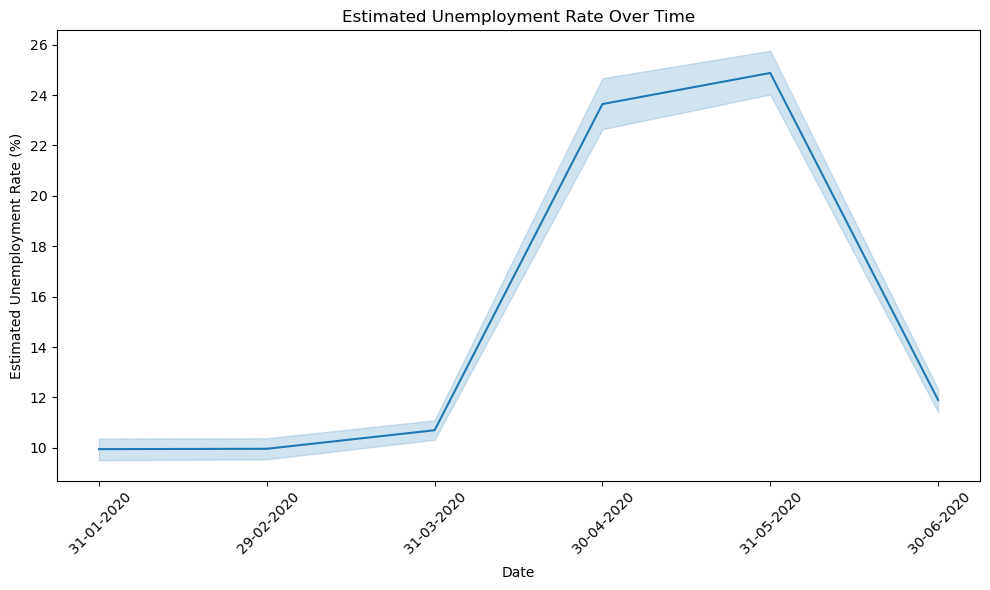

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the datasets
df1 = pd.read_csv(r"C:\Users\ARYAN PARIKH\Desktop\Oasis Internship\archive (1)\Unemployment in India.csv")
df2 = pd.read_csv(r"C:\Users\ARYAN PARIKH\Desktop\Oasis Internship\archive (1)\Unemployment_Rate_upto_11_2020.csv")

# Remove leading whitespace from column names
df1.columns = df1.columns.str.strip()
df2.columns = df2.columns.str.strip()

# Check column names
print("Columns in df1:", df1.columns)
print("Columns in df2:", df2.columns)

# Assuming 'Date' is the correct column in df1 and df2
merged_df = pd.merge(df1, df2, left_on='Date', right_on='Date', how='inner')

# Check data types
print(merged_df.dtypes)

# Convert 'Estimated Unemployment Rate (%)_x' and 'Estimated Unemployment Rate (%)_y' to numeric
merged_df['Estimated Unemployment Rate (%)_x'] = pd.to_numeric(
    merged_df['Estimated Unemployment Rate (%)_x'], errors='coerce'
)
merged_df['Estimated Unemployment Rate (%)_y'] = pd.to_numeric(
    merged_df['Estimated Unemployment Rate (%)_y'], errors='coerce'
)

# Combine the two columns into a single 'Estimated Unemployment Rate (%)' column
merged_df['Estimated Unemployment Rate (%)'] = (
    merged_df['Estimated Unemployment Rate (%)_x'].combine_first(
        merged_df['Estimated Unemployment Rate (%)_y']
    )
)

# Drop the original separate columns
merged_df.drop(
    ['Estimated Unemployment Rate (%)_x', 'Estimated Unemployment Rate (%)_y'],
    axis=1,
    inplace=True,
)

# Remove rows with NaN values in the combined 'Estimated Unemployment Rate (%)'
merged_df.dropna(subset=['Estimated Unemployment Rate (%)'], inplace=True)

# Plot the unemployment rate over time
plt.figure(figsize=(10, 6))
sns.lineplot(x='Date', y='Estimated Unemployment Rate (%)', data=merged_df)
plt.title('Estimated Unemployment Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Estimated Unemployment Rate (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
